# Figure 2

In [1]:
import scanpy as sc 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings

In [2]:
TEXT_WIDTH = 6.7261  # in
DPI = 350

In [3]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [4]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Adatas

In [5]:
path_rna = 'results/fig2_rna_d2.h5ad'
path_tcr = 'results/fig2_tcr_d2.h5ad'
path_dual = 'results/fig2_multimodal_d2.h5ad'

In [6]:
ad_rna = sc.read(path_rna)
ad_tcr = sc.read(path_tcr)
ad_dual = sc.read(path_dual)

## Colors

In [7]:
ad_rna.obs['binding_name'].value_counts()

B0801_RAKFKQLL_BZLF1_EBV_binder            16410
A0201_GILGFVFTL_Flu-MP_Influenza_binder     5412
A0301_KLGGALQAK_IE-1_CMV_binder             3587
A0201_GLCTLVAML_BMLF1_EBV_binder            1224
A1101_AVFDRKSDAK_EBNA-3B_EBV_binder          362
Name: binding_name, dtype: int64

In [8]:
mapper = {'A1101_IVTDFSVIK_EBNA-3B_EBV_binder': 'IVTDFSVIK',
          'A0301_KLGGALQAK_IE-1_CMV_binder': 'KLGGALQAK',
          'A0201_GILGFVFTL_Flu-MP_Influenza_binder': 'GILGFVFTL',
          'A0201_ELAGIGILTV_MART-1_Cancer_binder': 'ELAGIGILTV', 
          'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder': 'AVFDRKSDAK',
          'A0201_GLCTLVAML_BMLF1_EBV_binder': 'GLCTLVAML',
          'A0301_RLRAEAQVK_EMNA-3A_EBV_binder': 'RLRAEAQVK',
          'B0801_RAKFKQLL_BZLF1_EBV_binder': 'RAKFKQLL'}

color_palette = {'RAKFKQLL': 'tab:green',
                 'GILGFVFTL': 'tab:orange',
                 'KLGGALQAK': 'tab:purple',
                 'GLCTLVAML': 'tab:red',
                 'AVFDRKSDAK': 'tab:blue',
                 }

In [9]:
palette_clonotypes = {
    '-99': 'lightgray',
    '18840': 'tab:blue',
    '2210': 'tab:orange',
    '18847': 'tab:olive',
    '164': 'tab:red',
    '18944': 'tab:purple',
    '18937': 'tab:brown',
    '18932': 'tab:pink',
    '18864': 'tab:cyan',
    '19002': 'tab:green',
}

## Plot Figure

In [10]:
def plot_umap(adata, grouping, ax, legend=None, vmin=None, vmax=None):
    xy = adata.obsm['X_umap']
    colors = adata.obs[grouping].values
    if vmin is not None:
        colors = np.clip(colors, vmin, vmax)
    
    palette = None
    if grouping != 'large_clonotype':
        palette = 'viridis'
    if grouping == 'binding_name':
        colors = [mapper[el] for el in list(colors)]
        palette = color_palette
    if grouping == 'large_clonotype':
        palette = palette_clonotypes
    
    plot = sb.scatterplot(x=xy[:, 0], y=xy[:, 1], ax=ax, hue=colors, s=1, palette=palette)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set_yticks([])
    ax.set_xticks([])
    
    if legend is not None:
        ax.legend(markerscale=0.5, fontsize='small')
    else:
        ax.legend([], [], frameon=False)


In [11]:
def plot_colorbar(adata, gene, ax, vmin=None, vmax=None, name=None):
    palette = 'viridis'
    colors = adata.obs[gene].values
    norm = plt.Normalize(colors.min(), colors.max())
    if vmin is not None:
        norm = plt.Normalize(vmin, vmax)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    
    label = f'Log {gene}'
    if name is not None:
        label = name

    plt.colorbar(sm, label=name, cax=ax)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)

In [12]:
def plot_empty(ax):
    ax.axis('off')

In [13]:
def plot_umap_axis(ax):
    ax.arrow(x=-9, y=-6.8, dx=0, dy=4.8, width=0.2, color='black',
             head_width=0.6, head_length=0.8, length_includes_head=True, zorder=1) 
    ax.arrow(x=-9.1, y=-6.8, dx=4.2, dy=0, width=0.2, color='black', 
             head_width=0.7, head_length=0.6, length_includes_head=True, zorder=1) 
    ax.text(-9, -8.4, 'UMAP1', size='medium', weight='bold')
    ax.text(-10.5, -6.5, 'UMAP2', size='medium', weight='bold', rotation=90)

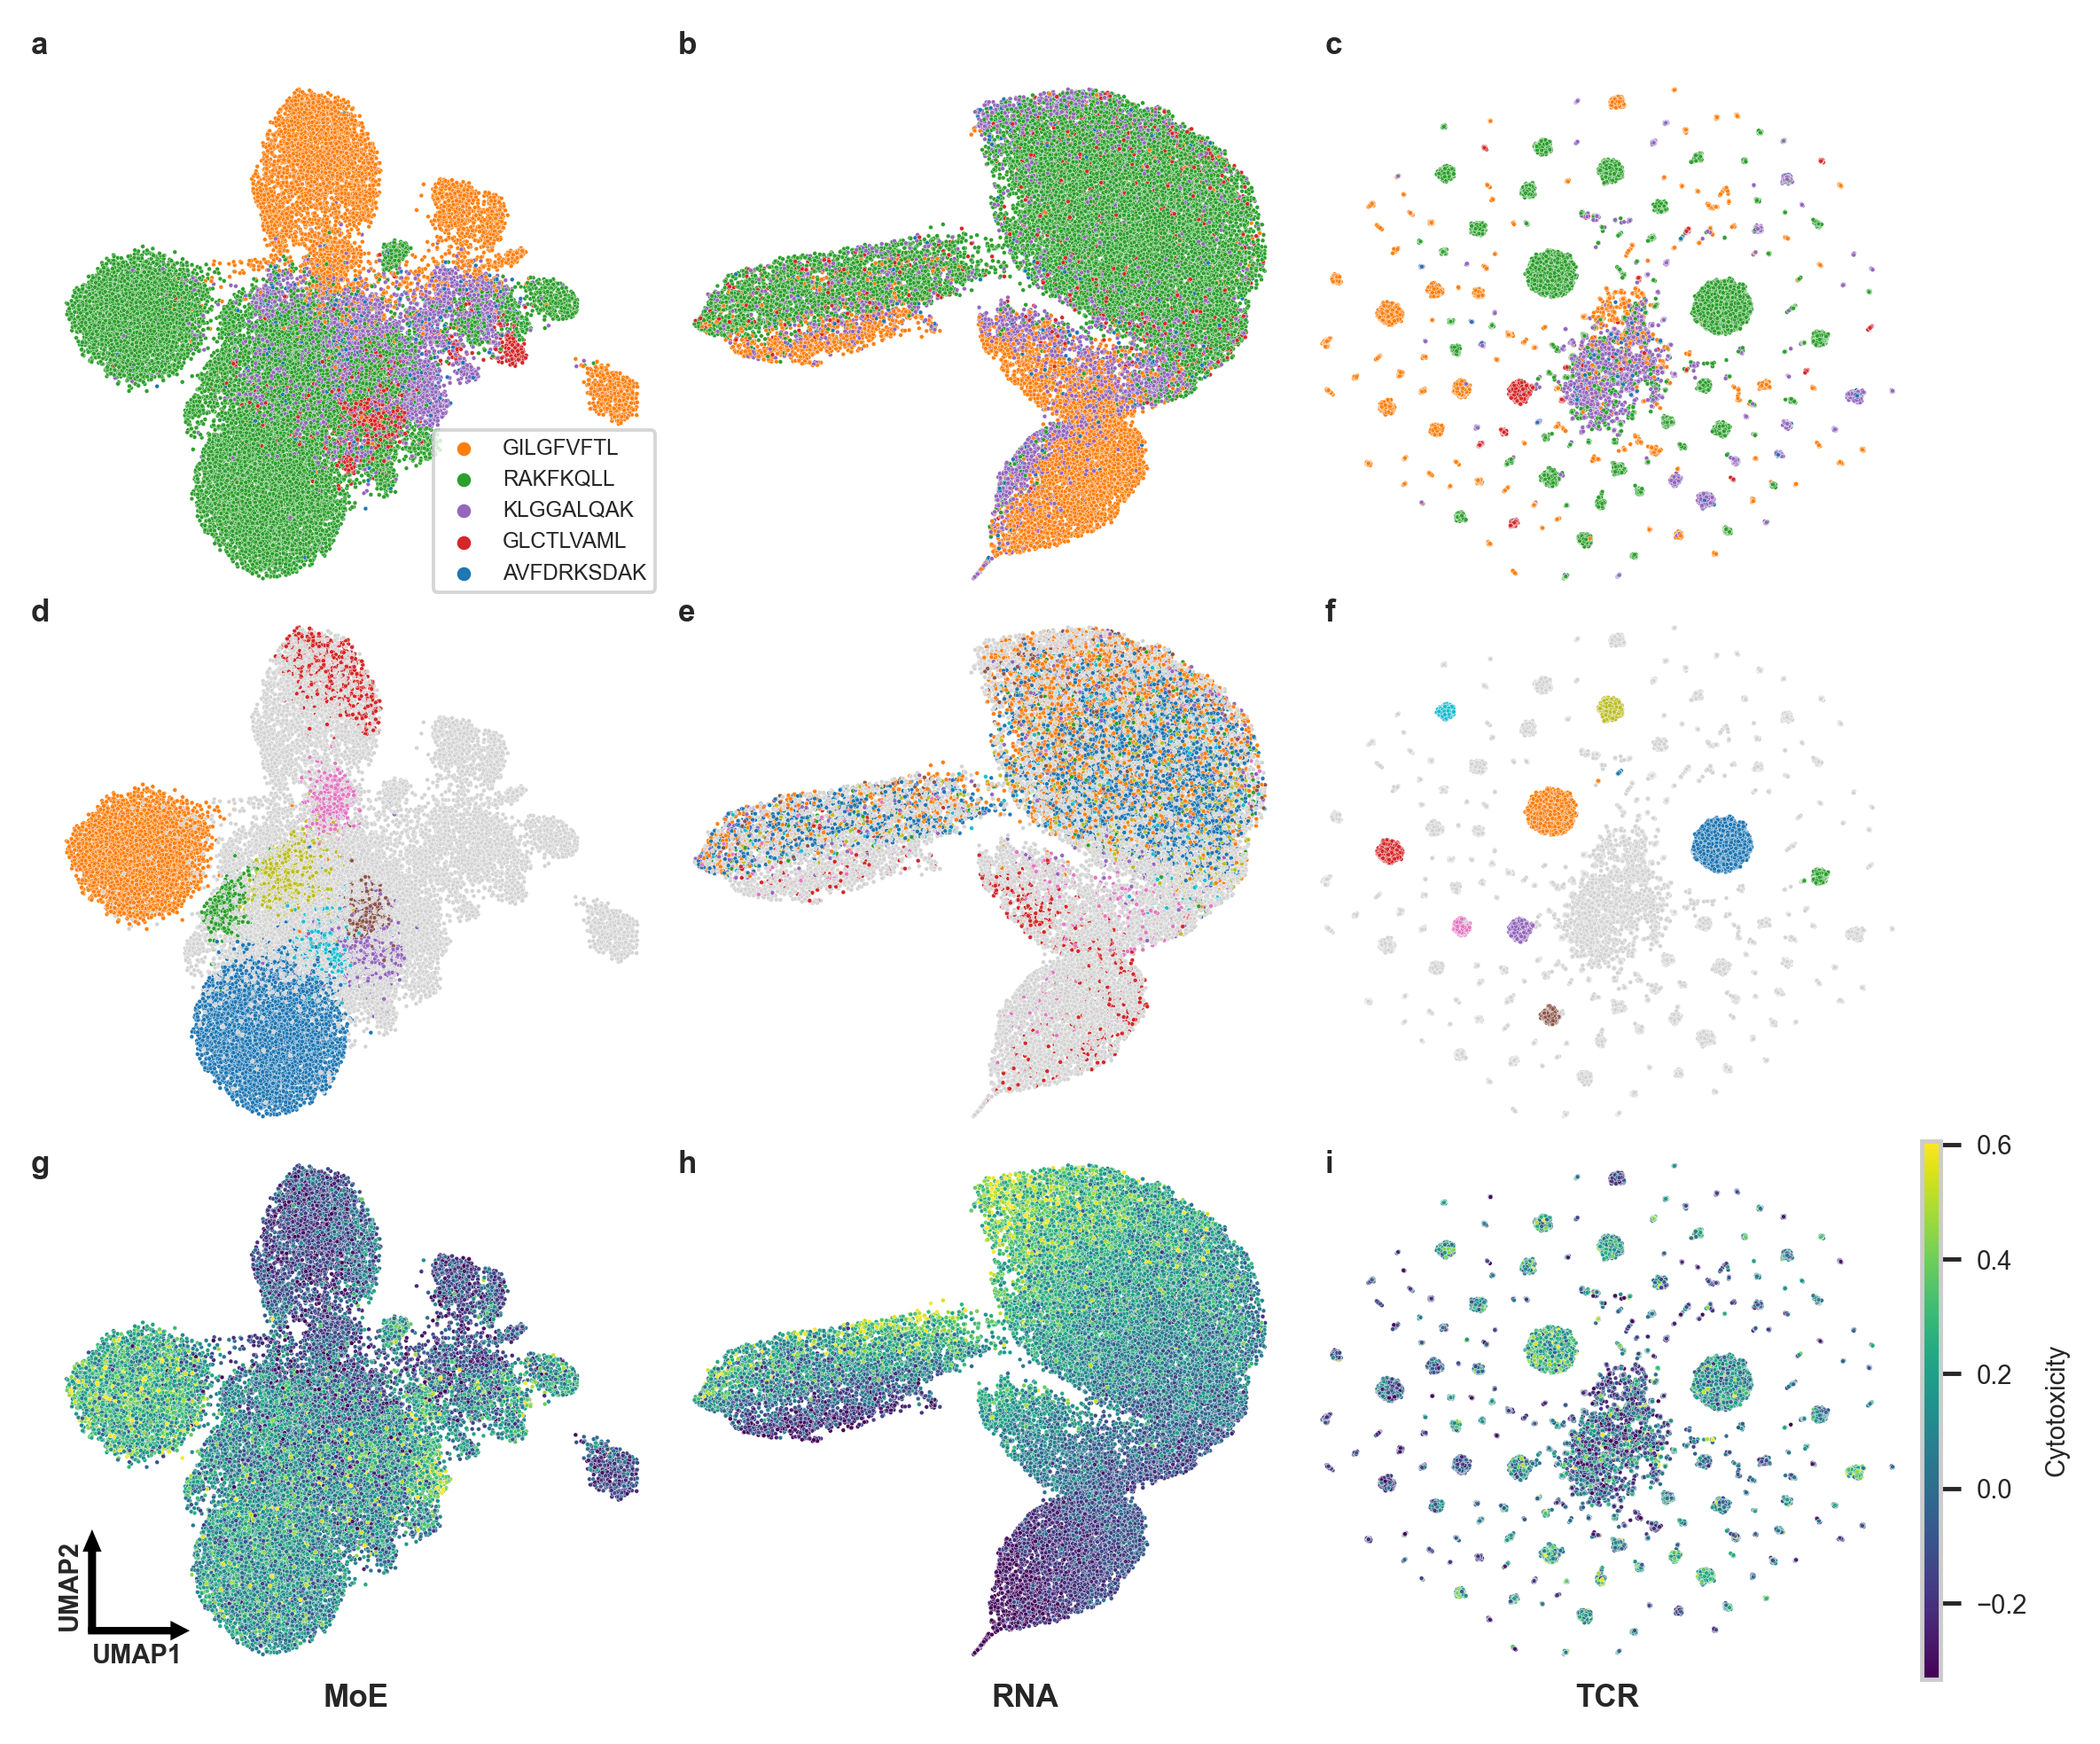

In [14]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)

gridspec = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=3,
    ncols=4,
    height_ratios=[1, 1, 1],
    width_ratios=[1, 1, 1, 0.03],
    wspace=0.,
    hspace=0.,
)

ax_11 = fig.add_subplot(gridspec[0])
ax_12 = fig.add_subplot(gridspec[1])
ax_13 = fig.add_subplot(gridspec[2])
ax_14 = fig.add_subplot(gridspec[3])
ax_21 = fig.add_subplot(gridspec[4])
ax_22 = fig.add_subplot(gridspec[5])
ax_23 = fig.add_subplot(gridspec[6])
ax_24 = fig.add_subplot(gridspec[7])
ax_31 = fig.add_subplot(gridspec[8])
ax_32 = fig.add_subplot(gridspec[9])
ax_33 = fig.add_subplot(gridspec[10])
ax_34 = fig.add_subplot(gridspec[11])

plot_umap(ad_dual, 'binding_name', ax_11, legend=True)
plot_umap(ad_rna, 'binding_name', ax_12)
plot_umap(ad_tcr, 'binding_name', ax_13)
plot_empty(ax_14)

plot_umap(ad_dual, 'large_clonotype', ax_21)
plot_umap(ad_rna, 'large_clonotype', ax_22)
plot_umap(ad_tcr, 'large_clonotype', ax_23)

plot_empty(ax_24)

lower, upper = np.percentile(ad_rna.obs['cd8 cytotoxic_score'], [1, 99])
plot_umap(ad_dual, 'cd8 cytotoxic_score', ax_31, vmin=lower, vmax=upper)
plot_umap(ad_rna, 'cd8 cytotoxic_score', ax_32, vmin=lower, vmax=upper)
plot_umap(ad_tcr, 'cd8 cytotoxic_score', ax_33, vmin=lower, vmax=upper)
plot_colorbar(ad_dual, 'cd8 cytotoxic_score', ax_34, vmin=lower, vmax=upper, name='Cytotoxicity')

fig.text(0.01, 0.99, 'a', size='large', weight='bold')
fig.text(0.32, 0.99, 'b', size='large', weight='bold')
fig.text(0.63, 0.99, 'c', size='large', weight='bold')
fig.text(0.01, 0.65, 'd', size='large', weight='bold')
fig.text(0.32, 0.65, 'e', size='large', weight='bold')
fig.text(0.63, 0.65, 'f', size='large', weight='bold')
fig.text(0.01, 0.32, 'g', size='large', weight='bold')
fig.text(0.32, 0.32, 'h', size='large', weight='bold')
fig.text(0.63, 0.32, 'i', size='large', weight='bold')

fig.text(0.15, 0., 'MoE', size='large', weight='bold')
fig.text(0.47, 0., 'RNA', size='large', weight='bold')
fig.text(0.75, 0., 'TCR', size='large', weight='bold')

plot_umap_axis(ax_31)

fig.tight_layout()
fig.savefig('figures/02_10x_umaps.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('figures/02_10x_umaps.png',
           dpi=DPI, bbox_inches='tight')